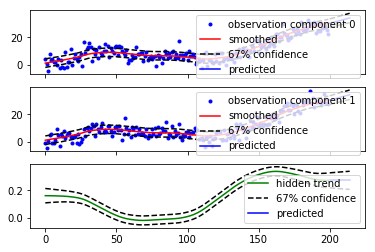

In [1]:
"""
Multi-dimensional observations example
"""

import simdkalman
import numpy as np
import numpy.random as random
%matplotlib inline

# In this model, there is a hidden trend and two independent noisy observations
# are made at each step
kf = simdkalman.KalmanFilter(
    state_transition = np.array([[1,1],[0,1]]),
    process_noise = np.diag([0.2, 0.01])**2,
    observation_model = [[1,0],[1,0]],
    observation_noise = np.eye(2)*3**2)

# simulate 100 time series of 200 two-dimensional observations
rand = lambda: random.normal(size=(100, 200))
data = np.cumsum(np.cumsum(rand()*0.02, axis=1) + rand(), axis=1)
data = np.dstack((data + rand()*3, data + rand()*3))

# smooth and explain existing data
smoothed = kf.smooth(data)
# predict new data
pred = kf.predict(data, 15)

import matplotlib.pyplot as plt

# show the first smoothed time series
i = 0

n_obs = data.shape[2]
_, axes = plt.subplots(n_obs+1, 1, sharex=True)

x = np.arange(0, data.shape[1])
x_pred = np.arange(data.shape[1], data.shape[1]+pred.observations.mean.shape[1])

for j in range(n_obs):
    ax = axes[j]

    ax.plot(x, data[i,:,j], 'b.', label="observation component %d" % j)
    smoothed_obs = smoothed.observations.mean[i,:,j]

    obs_stdev = np.sqrt(smoothed.observations.cov[i,:,j,j])
    ax.plot(x, smoothed_obs, 'r-', label="smoothed")
    ax.plot(x, smoothed_obs - obs_stdev, 'k--', label="67% confidence")
    ax.plot(x, smoothed_obs + obs_stdev, 'k--')

    y_pred = pred.observations.mean[i,:,j]
    pred_stdev = np.sqrt(pred.observations.cov[i,:,j,j])

    ax.plot(x_pred, y_pred, 'b-', label="predicted")
    ax.plot(x_pred, y_pred + pred_stdev, 'k--')
    ax.plot(x_pred, y_pred - pred_stdev, 'k--')
    ax.legend()

ax = axes[-1]

trend = smoothed.states.mean[i,:,1]
trend_stdev = np.sqrt(smoothed.states.cov[i,:,1,1])
ax.plot(x, trend, 'g-', label="hidden trend")
ax.plot(x, trend - trend_stdev, 'k--', label="67% confidence")
ax.plot(x, trend + trend_stdev, 'k--')

trend_pred = pred.states.mean[i,:,1]
trend_pred_stdev = np.sqrt(pred.states.cov[i,:,1,1])
ax.plot(x_pred, trend_pred, 'b-', label='predicted')
ax.plot(x_pred, trend_pred + trend_pred_stdev, 'k--')
ax.plot(x_pred, trend_pred - trend_pred_stdev, 'k--')
ax.legend()

plt.show()